In [1]:
# Final Project – Regression with PyCaret

# Dataset: Parkinson's Telemonitoring (UCI)  
# Task: Regression  
# Target Variable: `total_UPDRS`  

# - All useful attributes are used as predictors.
# - `motor_UPDRS` is not used as an attribute (only `total_UPDRS` is the target).
# - The workflow follows the PyCaret Regression tutorial:

# Setup ➡️ Compare Models ➡️ Analyze Model ➡️ Prediction ➡️ Save Model


In [ ]:
#INSTALL/IMPORT DEPENDENCIES

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install --quiet pycaret

import pycaret
print("PyCaret version:", pycaret.__version__)

PyCaret version: 3.2.0


In [4]:
!pip install joblib==1.2.0


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
from pycaret.regression import *

%matplotlib inline


In [ ]:
#LOAD DATASET

In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
parkinsons_telemonitoring = fetch_ucirepo(id=189) 
  
# data (as pandas dataframes) 
X = parkinsons_telemonitoring.data.features 
y = parkinsons_telemonitoring.data.targets 
  
# metadata 
print(parkinsons_telemonitoring.metadata) 
  
# variable information 
print(parkinsons_telemonitoring.variables) 


{'uci_id': 189, 'name': 'Parkinsons Telemonitoring', 'repository_url': 'https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring', 'data_url': 'https://archive.ics.uci.edu/static/public/189/data.csv', 'abstract': "Oxford Parkinson's Disease Telemonitoring Dataset", 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 5875, 'num_features': 19, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['motor_UPDRS', 'total_UPDRS'], 'index_col': ['subject#'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5ZS3N', 'creators': ['Athanasios Tsanas', 'Max Little'], 'intro_paper': {'ID': 229, 'type': 'NATIVE', 'title': "Accurate Telemonitoring of Parkinson's Disease Progression by Noninvasive Speech Tests", 'authors': 'A. Tsanas, Max A. Little, P. McSharry, L. Ramig', 'venue': 'IEEE Transactions on Bio

In [8]:
# Combine features (X) and targets (y) into one DataFrame
df = pd.concat([X, y], axis=1)

# Quick check
df.head(), df.shape


(   age  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
 0   72     5.6431    0.00662     0.000034     0.00401      0.00317   
 1   72    12.6660    0.00300     0.000017     0.00132      0.00150   
 2   72    19.6810    0.00481     0.000025     0.00205      0.00208   
 3   72    25.6470    0.00528     0.000027     0.00191      0.00264   
 4   72    33.6420    0.00335     0.000020     0.00093      0.00130   
 
    Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  ...  Shimmer:APQ11  \
 0     0.01204  0.02565        0.230       0.01438  ...        0.01662   
 1     0.00395  0.02024        0.179       0.00994  ...        0.01689   
 2     0.00616  0.01675        0.181       0.00734  ...        0.01458   
 3     0.00573  0.02309        0.327       0.01106  ...        0.01963   
 4     0.00278  0.01703        0.176       0.00679  ...        0.01819   
 
    Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  sex  motor_UPDRS  \
 0      0.04314  0.014290  21.640  0.41888  

In [ ]:
#EXPLORATORY DATA ANALYSIS

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   test_time      5875 non-null   float64
 2   Jitter(%)      5875 non-null   float64
 3   Jitter(Abs)    5875 non-null   float64
 4   Jitter:RAP     5875 non-null   float64
 5   Jitter:PPQ5    5875 non-null   float64
 6   Jitter:DDP     5875 non-null   float64
 7   Shimmer        5875 non-null   float64
 8   Shimmer(dB)    5875 non-null   float64
 9   Shimmer:APQ3   5875 non-null   float64
 10  Shimmer:APQ5   5875 non-null   float64
 11  Shimmer:APQ11  5875 non-null   float64
 12  Shimmer:DDA    5875 non-null   float64
 13  NHR            5875 non-null   float64
 14  HNR            5875 non-null   float64
 15  RPDE           5875 non-null   float64
 16  DFA            5875 non-null   float64
 17  PPE            5875 non-null   float64
 18  sex     

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
Jitter(%),5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter(Abs),5875.0,0.000044,0.000036,0.000002,0.000022,0.000034,0.000053,0.000446
Jitter:RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560
Jitter:DDP,5875.0,0.008962,0.009371,0.000980,0.004730,0.006750,0.009870,0.172630
Shimmer,5875.0,0.034035,0.025835,0.003060,0.019120,0.027510,0.039750,0.268630
Shimmer(dB),5875.0,0.310960,0.230254,0.026000,0.175000,0.253000,0.365000,2.107000
Shimmer:APQ3,5875.0,0.017156,0.013237,0.001610,0.009280,0.013700,0.020575,0.162670


In [11]:
df.isna().sum()

age              0
test_time        0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
sex              0
motor_UPDRS      0
total_UPDRS      0
dtype: int64

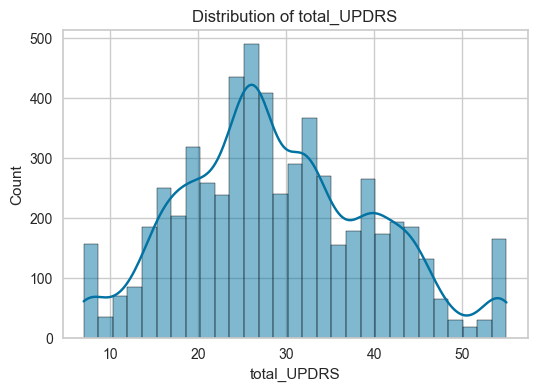

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['total_UPDRS'], kde=True)
plt.title('Distribution of total_UPDRS')
plt.show()


In [13]:
df.columns

Index(['age', 'test_time', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
       'DFA', 'PPE', 'sex', 'motor_UPDRS', 'total_UPDRS'],
      dtype='object')

In [ ]:
#CLEAN AND PREPARE DATASET

In [14]:
# Drop the forbidden attribute only
data_model = df.drop(columns=['motor_UPDRS'])

data_model.head(), data_model.shape

(   age  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
 0   72     5.6431    0.00662     0.000034     0.00401      0.00317   
 1   72    12.6660    0.00300     0.000017     0.00132      0.00150   
 2   72    19.6810    0.00481     0.000025     0.00205      0.00208   
 3   72    25.6470    0.00528     0.000027     0.00191      0.00264   
 4   72    33.6420    0.00335     0.000020     0.00093      0.00130   
 
    Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
 0     0.01204  0.02565        0.230       0.01438       0.01309   
 1     0.00395  0.02024        0.179       0.00994       0.01072   
 2     0.00616  0.01675        0.181       0.00734       0.00844   
 3     0.00573  0.02309        0.327       0.01106       0.01265   
 4     0.00278  0.01703        0.176       0.00679       0.00929   
 
    Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  \
 0        0.01662      0.04314  0.014290  21.640  0.41888  0.54842  0.16006   
 1  

In [15]:
print(data_model.columns)


Index(['age', 'test_time', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
       'DFA', 'PPE', 'sex', 'total_UPDRS'],
      dtype='object')


In [16]:
'motor_UPDRS' in data_model.columns

False

In [ ]:
#FIX ERROR - lightgbm not found

In [18]:
from pycaret.containers.models import regression

# Disable LightGBM model container so PyCaret doesn't try to import lightgbm
regression.LGBMRegressorContainer.active = False


In [ ]:
#PYCARET SETUP

In [19]:
s = setup(
    data=data_model,
    target='total_UPDRS',
    session_id=123,
    normalize=True,
    normalize_method='minmax',
    verbose=True
)



,Description,Value
0,Session id,123
1,Target,total_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 20)"
4,Transformed data shape,"(5875, 20)"
5,Transformed train set shape,"(4112, 20)"
6,Transformed test set shape,"(1763, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [ ]:
#COMPARE MODELS

In [20]:
best = compare_models()
best


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0129,3.1982,1.7826,0.9716,0.0972,0.0511,0.1580
rf,Random Forest Regressor,0.9994,3.9869,1.9825,0.9648,0.0973,0.0488,0.4800
dt,Decision Tree Regressor,1.0469,11.5594,3.3718,0.8978,0.1437,0.0472,0.0170
gbr,Gradient Boosting Regressor,3.9250,25.2806,5.0224,0.7763,0.2009,0.1679,0.2590
knn,K Neighbors Regressor,3.7889,38.9742,6.2370,0.6529,0.2448,0.1731,0.0160
ada,AdaBoost Regressor,7.2608,69.3152,8.3225,0.3853,0.3224,0.3185,0.1060
ridge,Ridge Regression,8.0417,94.4311,9.7127,0.1639,0.3638,0.3518,0.1790
br,Bayesian Ridge,8.0446,94.4344,9.7132,0.1638,0.3637,0.3517,0.0100
lr,Linear Regression,8.0534,94.6858,9.7267,0.1613,0.3638,0.3517,0.3780
huber,Huber Regressor,7.9388,95.8307,9.7843,0.1515,0.3599,0.3378,0.0270


ExtraTreesRegressor(n_jobs=-1, random_state=123)

In [ ]:
#CREATE BEST MODEL

In [21]:
et = create_model('et')
et_results = pull()
et_results


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0477,2.8878,1.6994,0.9742,0.0951,0.0525
1,0.9797,2.9683,1.7229,0.9704,0.0877,0.0493
2,0.8932,2.6007,1.6127,0.9759,0.0981,0.0472
3,0.9701,3.1095,1.7634,0.9735,0.0850,0.0450
4,0.9151,2.4132,1.5534,0.9799,0.0780,0.0422
5,1.0142,3.7973,1.9487,0.9702,0.1219,0.0605
6,1.0338,3.5315,1.8792,0.9691,0.0966,0.0487
7,1.1172,4.0754,2.0188,0.9615,0.1121,0.0585
8,1.1141,2.9545,1.7189,0.9744,0.0894,0.0511


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0477,2.8878,1.6994,0.9742,0.0951,0.0525
1,0.9797,2.9683,1.7229,0.9704,0.0877,0.0493
2,0.8932,2.6007,1.6127,0.9759,0.0981,0.0472
3,0.9701,3.1095,1.7634,0.9735,0.0850,0.0450
4,0.9151,2.4132,1.5534,0.9799,0.0780,0.0422
5,1.0142,3.7973,1.9487,0.9702,0.1219,0.0605
6,1.0338,3.5315,1.8792,0.9691,0.0966,0.0487
7,1.1172,4.0754,2.0188,0.9615,0.1121,0.0585
8,1.1141,2.9545,1.7189,0.9744,0.0894,0.0511


In [ ]:
#TUNE THE MODEL

In [22]:
tuned_et = tune_model(et)
tuned_et

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.7344,23.1999,4.8166,0.7929,0.2108,0.1714
1,3.4971,20.0933,4.4826,0.7994,0.2091,0.1717
2,3.2989,18.2217,4.2687,0.8310,0.1939,0.1540
3,3.6185,21.7337,4.6619,0.8150,0.1925,0.1554
4,3.5072,19.1084,4.3713,0.8408,0.1893,0.1564
5,3.6872,23.1791,4.8145,0.8178,0.2258,0.1843
6,3.6127,22.1556,4.7070,0.8060,0.1990,0.1581
7,3.3121,19.1323,4.3740,0.8192,0.2046,0.1606
8,3.6657,22.0569,4.6965,0.8092,0.1965,0.1585


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


ExtraTreesRegressor(n_jobs=-1, random_state=123)

In [ ]:
#Predict on Holdout Set

In [26]:
holdout_pred = predict_model(tuned_et)
holdout_pred.head()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.9489,2.8556,1.6899,0.9756,0.0841,0.0446


,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,...,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex,total_UPDRS,prediction_label
2661,55,117.779999,0.00506,0.000034,0.00164,0.00223,0.00493,0.01881,0.188,0.00886,...,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,0,26.663000,23.471076
1172,73,183.699997,0.00259,0.000011,0.00111,0.00104,0.00333,0.01376,0.129,0.00555,...,0.01277,0.01664,0.007869,26.225000,0.40624,0.60236,0.12222,1,29.031000,28.834920
1877,58,175.389999,0.00358,0.000020,0.00161,0.00168,0.00482,0.02201,0.201,0.01122,...,0.01787,0.03365,0.010896,22.733999,0.42592,0.57892,0.14130,1,25.417999,25.142170
547,74,142.699997,0.00484,0.000039,0.00207,0.00218,0.00622,0.03640,0.373,0.01970,...,0.02824,0.05911,0.017947,21.205000,0.62605,0.60507,0.14467,0,27.139000,27.489510
5068,56,105.790001,0.00545,0.000028,0.00320,0.00296,0.00961,0.02196,0.192,0.01252,...,0.01518,0.03755,0.015528,21.239000,0.36154,0.61082,0.11911,1,43.201000,42.804990


In [28]:
holdout_pred.columns


Index(['age', 'test_time', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
       'DFA', 'PPE', 'sex', 'total_UPDRS', 'prediction_label'],
      dtype='object')

In [ ]:
#Holdout Metrics (Manual Calculation)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# True values
y_true = holdout_pred['total_UPDRS']

# Predicted values
y_pred = holdout_pred['prediction_label']

# Metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

mae, rmse, r2

(0.9489048089780932, 1.6898571812757373, 0.9756304220339677)

In [ ]:
#Feature Importance

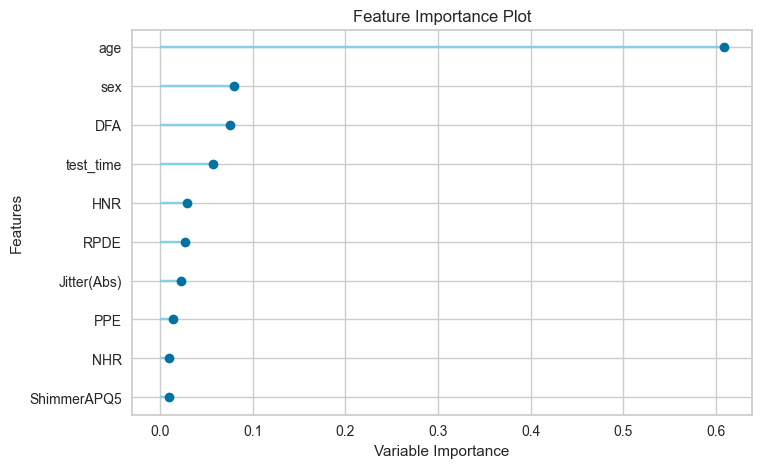

In [25]:
plot_model(tuned_et, plot='feature')


In [ ]:
#Residuals Plot

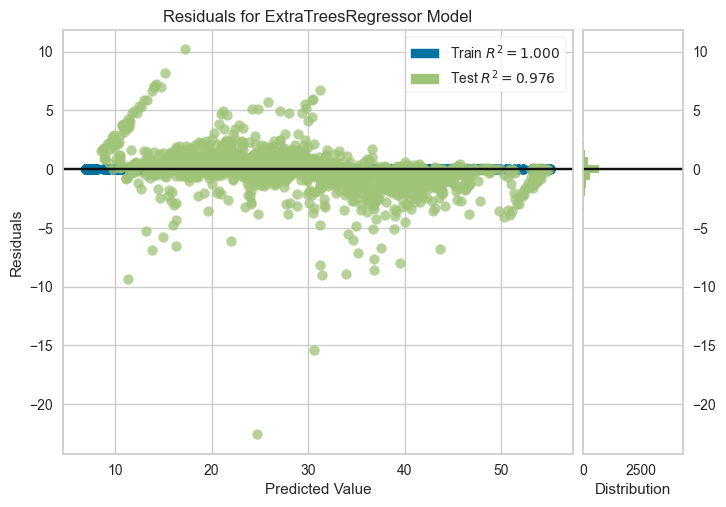

In [23]:
plot_model(tuned_et, plot='residuals')

In [ ]:
#Prediction Error Plot

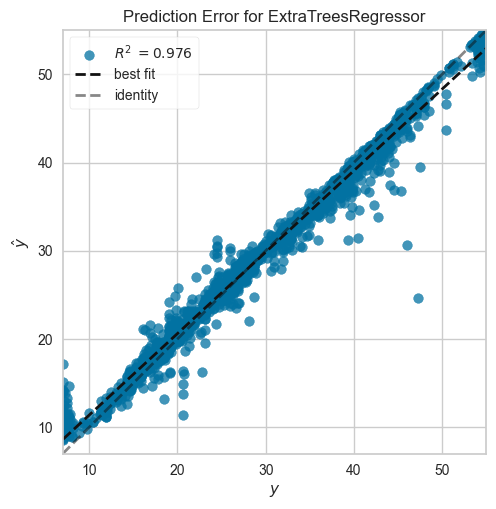

In [24]:
plot_model(tuned_et, plot='error')


In [ ]:
#Save Final Model

In [31]:
final_et = finalize_model(tuned_et)
save_model(final_et, 'parkinsons_total_UPDRS_et_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'test_time', 'Jitter(%)',
                                              'Jitter(Abs)', 'Jitter:RAP',
                                              'Jitter:PPQ5', 'Jitter:DDP',
                                              'Shimmer', 'Shimmer(dB)',
                                              'Shimmer:APQ3', 'Shimmer:APQ5',
                                              'Shimmer:APQ11', 'Shimmer:DDA',
                                              'NHR', 'HNR', 'RPDE', 'DFA', 'PPE',
                                              'sex'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler()))

In [ ]:
#CONCLUSION

In [ ]:
#Model Selection

#The Extra Trees Regressor outperformed all other models in both cross-validation and holdout evaluation, achieving an exceptionally high R² of 0.9756, this means that the model explains 97.56% of the variance in the total_UPDRS clinical scores.

#Model Performance

#MAE: 0.95 (less than 1 point error on average)

#RMSE: 1.69 (low overall error)

#R²: 0.976 (excellent predictive power)

#Interpretation of results

#These results show that the Extra Trees model provides highly accurate predictions of the Parkinson’s disease progression score (total_UPDRS), making it a strong model that is reliable and therefore suitable for clinical decision-support or early disease monitoring applications.